**Task 1**: You are required do a proper analysis of the whole data, plot all relevant plots, make note to all observations

**Task 2**: Let sample 100 transactions (denoted by S) from whole data (denoted by D), for every transaction in S, print 10 transactions from D which have least values of `similarity`

The similarity between any two vectors is defined as
$\text{similarity}(v_i,v_j) = \text{cos}^{-1} [ \frac{(v_i \cdot v_j)}{length(v_i) \times length(v_j)} ]$

1. $v_i$ represents a vector i.e. a row in your data.
2. $\text{similarity}(i,j)$ is just a function you can think it like $f(x,y)$
3. $\text{length}(v_i)$: length of the vector $v_i$
4. $i \cdot j$ is the dot product between the vectors $v_i$, $v_j$ 

**Task 3**: Apply 5 different ML algorithms to build classification models.





## Task 1 : Performing EDA(Exploratory Data Analysis on credit card data)

### About the data:

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

**Feature 'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The **Feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

**Feature 'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.



EDA is performed only on Time and Amount Feature.

#### Find and load the dataset from github

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_card_data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv")
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Print out dataframe information, shape, and count the values of `Class` to check if the data is imbalanced

In [3]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#finding the shape of dataframe (finding no.of observations and features in the given dataframe)
print("No.of observations: ",credit_card_data.shape[0])
print("No.of features: ", credit_card_data.shape[1])

No.of observations:  284807
No.of features:  31


In [5]:
#finding whether it is balanced data or imbalanced data
credit_card_data.value_counts()

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0        18
          -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.85819

From the above info it is clear that it is an imbalanced dataset

#### Let rename the class variables 

0 - legitimate

1- fraud

In [6]:
credit_card_data =  credit_card_data.replace({"Class": {0: "legitimate", 1: "fraud"}})

In [7]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,legitimate
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,legitimate
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,legitimate
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,legitimate
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,legitimate
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,legitimate
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,legitimate
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,legitimate


#### Subsetting the dataset, including only `Time`,`Amount`,`Class`

In [8]:
#subsetting the dataset 
credit_card_data_subset = credit_card_data[['Time','Amount','Class']]

#### Check the distribution of data (to check whether our subset of data contains same count as original dataset)

In [9]:
#checking the distribution of data (to check whether our subset of data contains same count as original dataset)
credit_card_data_subset['Class'].value_counts()

legitimate    284315
fraud            492
Name: Class, dtype: int64

#### Performing EDA on this data (Pair plots using `seaborns` to find out which features have more importance when compared to other features)


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

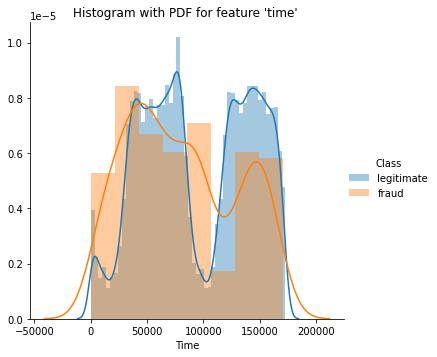

In [12]:
sns.FacetGrid(credit_card_data_subset,hue='Class',size = 5).map(sns.distplot,'Time').add_legend()
plt.title("Histogram with PDF for feature 'time' ")
plt.show()

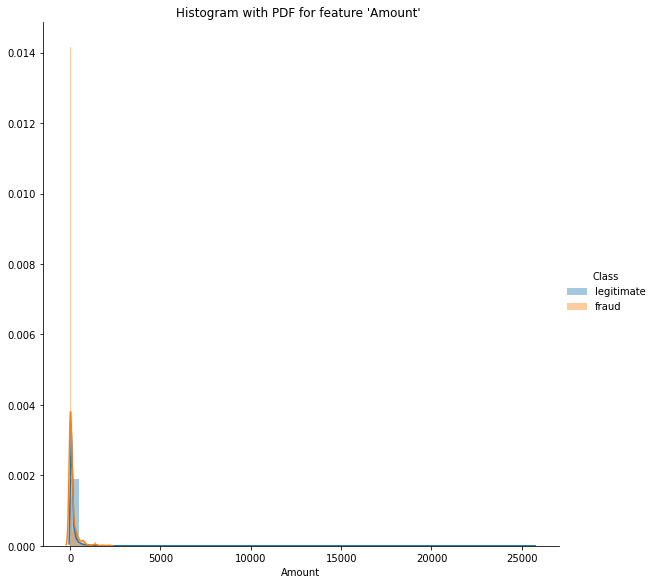

In [13]:
sns.FacetGrid(credit_card_data_subset,hue='Class',size=8).map(sns.distplot,'Amount').add_legend()
plt.title("Histogram with PDF for feature 'Amount' ")
plt.show()

**Observation:**

1.It is evident that the feature 'time' has so much of overlapping. We couldn't make any predictions or classifications out of it. So, we could discard this feature in classification of outcome.

2.Whereas the feature 'Amount' has also overlapping but we could make some prediction out of it when compared to another feature. 
    

    

#### Let divide the data according to classes for appropriate analysis

In [14]:
#dividing the data according to classes for appropriate analysis
credit_card_data_subset_class_fraud = credit_card_data_subset[credit_card_data_subset['Class'] == 'fraud']

In [15]:
credit_card_data_subset_class_fraud.shape

(492, 3)

In [16]:
credit_card_data_subset_class_fraud.head()

,Time,Amount,Class
541,406.0,0.00,fraud
623,472.0,529.00,fraud
4920,4462.0,239.93,fraud
6108,6986.0,59.00,fraud
6329,7519.0,1.00,fraud


In [17]:
credit_card_data_subset_class_legitimate = credit_card_data_subset[credit_card_data_subset['Class'] == 'legitimate']

In [18]:
credit_card_data_subset_class_legitimate.shape

(284315, 3)

In [19]:
credit_card_data_subset_class_legitimate.head()

,Time,Amount,Class
0,0.0,149.62,legitimate
1,0.0,2.69,legitimate
2,1.0,378.66,legitimate
3,1.0,123.50,legitimate
4,2.0,69.99,legitimate


### Univariate Analysis on feature 'Amount'

### Plotting **CDF(Cumulative Distributive Function)** and **PDF(Probability Density Function)** to analyze more about the data

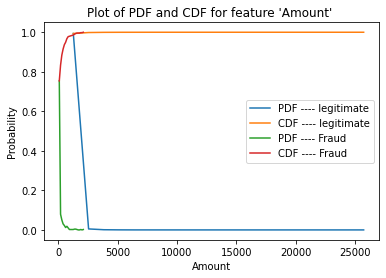

In [20]:
count,bin_edges = np.histogram(credit_card_data_subset_class_legitimate['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#print("PDF : ",PDF)
#print("\nbin edges : " , bin_edges)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- legitimate")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- legitimate")

count,bin_edges = np.histogram(credit_card_data_subset_class_fraud['Amount'],bins = 20,density = True)
PDF = count/sum(count)
#computing CDF with help of PDF 
CDF = np.cumsum(PDF)
#plotting PDF,CDF
plt.plot(bin_edges[1:],PDF,label = "PDF ---- Fraud")
plt.plot(bin_edges[1:],CDF,label = "CDF ---- Fraud")

plt.xlabel("Amount")
plt.ylabel("Probability")
plt.title("Plot of PDF and CDF for feature 'Amount' ")
plt.legend()
plt.show()

**Observation and Conclusion **

1.From the above plot we can observe that there is slight overlap between CDF's of both classes

2.But , we can make an observation that more than **95% of fraud transactions** have **purchase Amount below 2500** approximately.

3.From that we can conclude that if the amount of purchase is below 2500 it is more likely to be a fraud transaction else can be classified as a legitimate 

### Box plot and whiskers

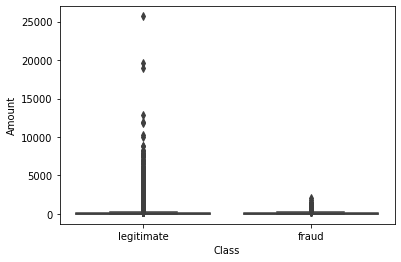

In [21]:
sns.boxplot(data = credit_card_data_subset,x='Class',y='Amount')

### Violin plot

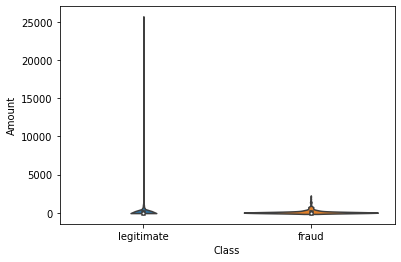

In [22]:
sns.violinplot(data= credit_card_data_subset,x='Class',y='Amount')

**Observation:**
    
These both plots(Box plots as well as Violin plots) are difficult to analyze when compared to PDF and CDF as the data is imbalanced,huge dataset and also scale is not so clear.

## Task 2 : Finding the least values of similarities 
Task 2: Sample (S) 100 transactions from whole data (D), for every transaction in S, print 10 transactions from D which have least values of 'similarity'



In [23]:
#creating a sample of 100 values from Data , 
#sample will not have 'Class' feature in it because for comparison we don't need 'Class' feature.
credit_card_data_sample = credit_card_data[credit_card_data.columns[:-1]].sample(100)

In [24]:
#indexes of all the samples (100 samples)
credit_card_data_sample.index

Int64Index([ 13313, 145557, 270748, 277529, 164076,  71679, 227681,  33231,
            118522, 215622, 162306, 152509, 120380, 229662,  26714, 238826,
            185862, 224507, 237309,  31108,  50557, 187567, 126289,  63528,
            147182, 228813,  66625, 104881, 222493, 148255,  35376, 193712,
            184156, 137428, 251046, 154476, 168374,  11345, 168873, 260699,
              4415, 125187, 160148, 217252, 128692, 206135, 171143,  53695,
            160725, 117869, 146791,  43565, 263978, 250545, 156431, 187936,
             58450, 206789,  13832,  12183, 139817,  59106, 243585,  87564,
            242443, 259140,  98117,  10365, 269717, 244501,  39157, 263971,
            201909, 105284,  76813,  18681, 181753, 151035, 247783, 177186,
            220553, 245593, 148220, 102418, 255638,  31508, 242831, 156729,
            283751, 261269, 172033,  24725, 214318, 204172,  75407, 221239,
            201492,  61014, 124409,  39893],
           dtype='int64')

In [25]:
credit_card_data_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13313,23471.0,0.799441,0.000477,1.554963,2.764696,-0.098166,1.982800,-0.863931,0.595981,1.189037,-0.045064,1.389566,-1.817905,1.927719,1.216261,0.442147,-0.611546,1.466357,-1.730405,-2.964475,-0.188131,0.137927,0.777529,0.071821,-0.676590,-0.001926,0.168729,0.073464,0.028406,67.70
145557,87049.0,1.989187,-2.003292,-0.260944,-1.269068,-1.750711,0.221554,-1.537524,0.046073,-0.507921,1.259050,-1.279381,-0.088885,1.168040,-1.232182,-1.078216,-0.710499,0.739217,-0.367819,0.067718,-0.129755,-0.321523,-0.512279,0.317655,0.660231,-0.516737,-0.408404,0.044020,-0.005164,137.95
270748,164238.0,2.012306,0.101479,-1.609569,0.336055,0.412670,-0.575526,0.066015,-0.070916,0.231020,-0.215648,1.329220,0.877681,-0.124147,-0.618018,-0.453503,0.405313,0.347865,0.048767,0.204005,-0.163092,-0.296625,-0.780851,0.357734,0.608348,-0.329090,0.148578,-0.063391,-0.039679,0.89
277529,167696.0,-0.401019,1.267808,-1.026141,-1.083132,0.724874,-1.491504,1.197728,0.130875,-0.708381,-0.512190,0.624808,0.328188,-1.174690,1.414789,-0.786444,-0.393268,-0.345628,0.134955,0.051960,-0.250927,0.339205,0.999490,-0.187500,0.048504,-0.371521,0.073989,0.265244,0.195032,0.77
164076,116429.0,2.041446,0.109023,-1.786224,0.395923,0.504154,-0.773951,0.240085,-0.255229,0.441668,-0.400458,-0.639357,0.307821,0.494122,-0.927788,0.175867,0.346379,0.394592,-0.300804,0.101683,-0.078072,-0.356246,-0.953082,0.295231,0.391014,-0.232302,0.177535,-0.064687,-0.027137,24.99


In [26]:
#removing class for credit_card_data also.
credit_card_data_without_label = credit_card_data[credit_card_data.columns[:-1]]

In [27]:
credit_card_data_without_label.shape

(284807, 30)

#### Create a function called similarity to check for the similarity and return least 10 transactions:


In [28]:
def similarity(sample, whole_data): 
    """Returns a dataframe of top 10 least values of similarity
    sample -- pass the one of the index of sample and
    whole_data -- entire dataframe , as we have to compare each row in dataframe with sample."""
    # Your code here
    index_value = []
    Class = []
    similarity_list = []
    for i in whole_data.index:
        similarity_value = np.arccos(np.dot(credit_card_data_sample.loc[sample],credit_card_data_without_label.loc[i])/(np.linalg.norm(credit_card_data_sample.loc[sample])*np.linalg.norm(credit_card_data_without_label.loc[i])))
        similarity_list.append(similarity_value)
        Class.append(credit_card_data['Class'][i])
        index_value.append(i)
    similarity_df = pd.DataFrame({'index_value':index_value,'similarity_value':similarity_list,'Class':Class})
    print(f"sample index value is {sample} ")
    return similarity_df.sort_values('similarity_value').head(10)
    


In [29]:
sample_index = int(input("Enter the one of the index value from your credit_card_data_sample : "))

Enter the one of the index value from your credit_card_data_sample : 4


In [30]:
# similarity(sample_index,credit_card_data_without_label)   

### **Task 3**

In [31]:
from sklearn.model_selection import train_test_split
import time

In [32]:
X = credit_card_data_without_label.copy()
y = credit_card_data['Class'].replace({'legitimate': 0, 'fraud': 1})

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
def dummy_classifier():
  from sklearn.dummy import DummyClassifier
  from sklearn.metrics import recall_score, accuracy_score, precision_score

  dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
  y_dummy_predictions = dummy_majority.predict(X_test)

  ans = (accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions), precision_score(y_test, y_dummy_predictions))
  return ans

start = time.time()
dc = dummy_classifier()
end = time.time()
dc_time = end - start

In [35]:
def svc():
  from sklearn.metrics import recall_score, precision_score, accuracy_score
  from sklearn.svm import SVC

  svm = SVC().fit(X_train, y_train)
  y_predictions = svm.predict(X_test)

  ans = (accuracy_score(y_test, y_predictions), recall_score(y_test, y_predictions), precision_score(y_test, y_predictions))
  return ans


start = time.time()
svc = svc()
end = time.time()
svc_time = end - start


In [36]:
def decision_tree():
  from sklearn.metrics import recall_score, precision_score, accuracy_score
  from sklearn.tree import DecisionTreeClassifier

  dtc = DecisionTreeClassifier().fit(X_train, y_train)
  y_predictions = dtc.predict(X_test)

  ans = (accuracy_score(y_test, y_predictions), recall_score(y_test, y_predictions), precision_score(y_test, y_predictions))
  return ans


start = time.time()
dt = decision_tree()
end = time.time()
dt_time = end - start

In [37]:
def knn():
  from sklearn.metrics import recall_score, precision_score, accuracy_score
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier().fit(X_train, y_train)
  y_predictions = knn.predict(X_test)

  ans = (accuracy_score(y_test, y_predictions), recall_score(y_test, y_predictions), precision_score(y_test, y_predictions))
  return ans


start = time.time()
knn = knn()
end = time.time()
knn_time = end - start


In [38]:
def logistic_regression():
  from sklearn.metrics import recall_score, precision_score, accuracy_score
  from sklearn.linear_model import LogisticRegression
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  ans = (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred))
  return ans


start = time.time()
lr = logistic_regression()
end = time.time()
lr_time = end - start

In [39]:
result = {
    "Model": ["Dummy Classifier", "SVC", "Descision Tree", "KNN", "Logistic Regression"],
    "Accuracy Score": [dc[0], svc[0], dt[0], knn[0], lr[0]],
    "Recall Score": [dc[1], svc[1], dt[1], knn[1], lr[1]],
    "Precision Score": [dc[2], svc[2], dt[2], knn[2], lr[2]],
    "Runtime": [dc_time, svc_time, dt_time, knn_time, lr_time]
}

### **Observations and Conclusion**

In [40]:
pd.DataFrame(result)

,Model,Accuracy Score,Recall Score,Precision Score,Runtime
0,Dummy Classifier,0.998280,0.000000,0.000000,0.049786
1,SVC,0.998280,0.000000,0.000000,13.779455
2,Descision Tree,0.999286,0.755102,0.816176,12.639936
3,KNN,0.998338,0.040816,0.857143,5.121998
4,Logistic Regression,0.998947,0.687075,0.696552,3.069419
